# Part I - Data Visualization of Loan Dataset from Prosper
## by Obi-Okonkwo Chisom

### Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The focus is on 12 of those variables.

### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan_data=pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# making a copy of the dataset and narrowing it down to the appropriate variables
loan_copy=loan_data.copy()
loan_copy=loan_copy[['ListingKey','CreditGrade','Term','LoanStatus','BorrowerRate','ProsperRating (Alpha)',
           'EmploymentStatusDuration','CreditScoreRangeLower','CreditScoreRangeUpper','StatedMonthlyIncome',
            'LoanOriginalAmount','MonthlyLoanPayment']]

In [5]:
print(loan_copy.shape)
loan_copy.info()

(113937, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   CreditGrade               28953 non-null   object 
 2   Term                      113937 non-null  int64  
 3   LoanStatus                113937 non-null  object 
 4   BorrowerRate              113937 non-null  float64
 5   ProsperRating (Alpha)     84853 non-null   object 
 6   EmploymentStatusDuration  106312 non-null  float64
 7   CreditScoreRangeLower     113346 non-null  float64
 8   CreditScoreRangeUpper     113346 non-null  float64
 9   StatedMonthlyIncome       113937 non-null  float64
 10  LoanOriginalAmount        113937 non-null  int64  
 11  MonthlyLoanPayment        113937 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 10.4+ MB


In [6]:
loan_copy.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,1021339766868145413AB3B,C,36,Completed,0.1580,NaN,2.0,640.0,659.0,3083.333333,9425,330.43
1,10273602499503308B223C1,NaN,36,Current,0.0920,A,44.0,680.0,699.0,6125.000000,10000,318.93
2,0EE9337825851032864889A,HR,36,Completed,0.2750,NaN,NaN,480.0,499.0,2083.333333,3001,123.32
3,0EF5356002482715299901A,NaN,36,Current,0.0974,A,113.0,800.0,819.0,2875.000000,10000,321.45
4,0F023589499656230C5E3E2,NaN,36,Current,0.2085,D,44.0,680.0,699.0,9583.333333,15000,563.97


### Tidiness Issues
<ol>
<li>One variable of credit grade in two columns of credit grade and prosper rating (alpha)</li>
<li>Credit grade, Term and Loan status should be categorical variables</li>
<li>Reducing the number of categories in Loan status</li>
</ol>

#### Issue 1

##### Define:
One variable of credit grade in two columns of credit grade (pre-2009) and prosper rating (alpha) (after 2009).

##### Code:

In [7]:
# replacing np.nan with an empty string
loan_copy['CreditGrade'].replace(np.nan,'',inplace=True)
loan_copy['ProsperRating (Alpha)'].replace(np.nan,'',inplace=True)

# adding both cols together (one col is pre-2009, the other is after 2009)
loan_copy['Credit_Grade']=loan_copy['CreditGrade']+loan_copy['ProsperRating (Alpha)']
loan_copy['Credit_Grade'].replace('','N/A',inplace=True) 

##### Test

In [8]:
loan_copy.Credit_Grade.value_counts()

C      23994
B      19970
D      19427
A      17866
E      13084
HR     10443
AA      8881
NC       141
N/A      131
Name: Credit_Grade, dtype: int64

#### Issue 2

##### Define:
Making a new variable of interest from CreditScoreRangeLower and CreditScoreRangeUpper

##### Code:

In [9]:
# getting the mean credit score
loan_copy['Credit_Score']=(loan_copy['CreditScoreRangeLower']+loan_copy['CreditScoreRangeUpper'])/2

##### Test

In [10]:
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   CreditGrade               113937 non-null  object 
 2   Term                      113937 non-null  int64  
 3   LoanStatus                113937 non-null  object 
 4   BorrowerRate              113937 non-null  float64
 5   ProsperRating (Alpha)     113937 non-null  object 
 6   EmploymentStatusDuration  106312 non-null  float64
 7   CreditScoreRangeLower     113346 non-null  float64
 8   CreditScoreRangeUpper     113346 non-null  float64
 9   StatedMonthlyIncome       113937 non-null  float64
 10  LoanOriginalAmount        113937 non-null  int64  
 11  MonthlyLoanPayment        113937 non-null  float64
 12  Credit_Grade              113937 non-null  object 
 13  Credit_Score              113346 non-null  f

#### Issue 3

##### Define:
Reducing the number of categories in Loan status. Loans that are past due up to 120 days are called delinquent loans while loans past due more than 120 days are defaulted loans.

##### Code:

In [11]:
loan_copy['LoanStatus'].replace('Past Due (1-15 days)','Delinquent',inplace=True)
loan_copy['LoanStatus'].replace('Past Due (16-30 days)','Delinquent',inplace=True)
loan_copy['LoanStatus'].replace('Past Due (31-60 days)','Delinquent',inplace=True)
loan_copy['LoanStatus'].replace('Past Due (61-90 days)','Delinquent',inplace=True)
loan_copy['LoanStatus'].replace('Past Due (91-120 days)','Delinquent',inplace=True)

loan_copy['LoanStatus'].replace('Past Due (>120 days)','Defaulted',inplace=True)

##### Test

In [12]:
loan_copy['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5034
Delinquent                 2051
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
# dropping irrelvant columns
loan_copy.drop(['CreditGrade','ProsperRating (Alpha)','CreditScoreRangeLower','CreditScoreRangeUpper'],axis=1,inplace=True)

# removing observations with empty values for employment duration, current deliquencies and Credit_Grade
loan_copy=loan_copy.dropna(subset=['EmploymentStatusDuration','Credit_Grade'])

# removing rows without a Credit Grade
loan_copy=loan_copy[loan_copy.Credit_Grade!='N/A']

In [14]:
loan_copy.Credit_Grade.value_counts()

C     22873
B     19182
D     18202
A     17262
E     11637
HR     8821
AA     8204
Name: Credit_Grade, dtype: int64

#### Issue 4

##### Define:
Credit grade, Term and Loan status should be categorical variables.

##### Code:

In [15]:
# convert Credit_Grade, Term and LoanStatus into ordered categorical types
ordinal_var_dict = {'Credit_Grade': ['AA','A','B','C','D','E','HR'],
                    'Term': [12,36,60],
                   'LoanStatus':['Completed','FinalPaymentInProgress','Current','Delinquent','Defaulted','Chargedoff','Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
    loan_copy[var]=loan_copy[var].astype(ordered_var)

##### Test

In [16]:
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106181 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ListingKey                106181 non-null  object  
 1   Term                      106181 non-null  category
 2   LoanStatus                106181 non-null  category
 3   BorrowerRate              106181 non-null  float64 
 4   EmploymentStatusDuration  106181 non-null  float64 
 5   StatedMonthlyIncome       106181 non-null  float64 
 6   LoanOriginalAmount        106181 non-null  int64   
 7   MonthlyLoanPayment        106181 non-null  float64 
 8   Credit_Grade              106181 non-null  category
 9   Credit_Score              106181 non-null  float64 
dtypes: category(3), float64(5), int64(1), object(1)
memory usage: 6.8+ MB


In [17]:
loan_copy.reset_index(inplace=True,drop=True)

In [18]:
# making an empty column in the dataframe
loan_copy['basic_loan_status']=''

In [19]:
# The different loan statuses are big jargons to a layman. So I am categorizing them in 3 broad categories
loan_copy.loc[loan_copy['LoanStatus']=='Completed','basic_loan_status']='Completed'
loan_copy.loc[loan_copy['LoanStatus']=='FinalPaymentInProgress','basic_loan_status']='Completed'
loan_copy.loc[loan_copy['LoanStatus']=='Current','basic_loan_status']='Current'
loan_copy.loc[loan_copy['LoanStatus']=='Delinquent','basic_loan_status']='Defaulted'
loan_copy.loc[loan_copy['LoanStatus']=='Defaulted','basic_loan_status']='Completed'
loan_copy.loc[loan_copy['LoanStatus']=='Chargedoff','basic_loan_status']='Defaulted'
loan_copy.loc[loan_copy['LoanStatus']=='Cancelled','basic_loan_status']='Defaulted'

In [20]:
loan_copy['basic_loan_status'].value_counts()

Current      56566
Completed    36935
Defaulted    12680
Name: basic_loan_status, dtype: int64

In [21]:
loan_copy.describe()

,BorrowerRate,EmploymentStatusDuration,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Credit_Score
count,106181.000000,106181.000000,1.061810e+05,106181.000000,106181.000000,106181.000000
mean,0.193016,96.098511,5.671257e+03,8571.843324,279.182671,700.711799
std,0.075189,94.502961,7.611292e+03,6267.426288,192.206503,56.415882
min,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,529.500000
25%,0.133400,26.000000,3.330167e+03,4000.000000,139.010000,669.500000
50%,0.183900,67.000000,4.750000e+03,7000.000000,229.280000,689.500000
75%,0.251100,137.000000,6.916667e+03,12000.000000,377.810000,729.500000
max,0.360000,755.000000,1.750003e+06,35000.000000,2251.510000,889.500000


In [22]:
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106181 entries, 0 to 106180
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ListingKey                106181 non-null  object  
 1   Term                      106181 non-null  category
 2   LoanStatus                106181 non-null  category
 3   BorrowerRate              106181 non-null  float64 
 4   EmploymentStatusDuration  106181 non-null  float64 
 5   StatedMonthlyIncome       106181 non-null  float64 
 6   LoanOriginalAmount        106181 non-null  int64   
 7   MonthlyLoanPayment        106181 non-null  float64 
 8   Credit_Grade              106181 non-null  category
 9   Credit_Score              106181 non-null  float64 
 10  basic_loan_status         106181 non-null  object  
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 6.8+ MB


##### What is the structure of your dataset?

> There are 106312 observations of loans here with 12 selected variables, most of them being numeric.

##### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the loan status of an observation.

##### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the Loan original amount would play a big role in determining the loan status of a loan.

## Univariate Exploration

### Question: 
Starting from the variable of interest, what is the distribution of the different loan statuses?

##### Visualization

In [23]:
# saving the loan_status column variables in a list according to frequency
loan_status=loan_copy['LoanStatus'].value_counts().index.to_list()

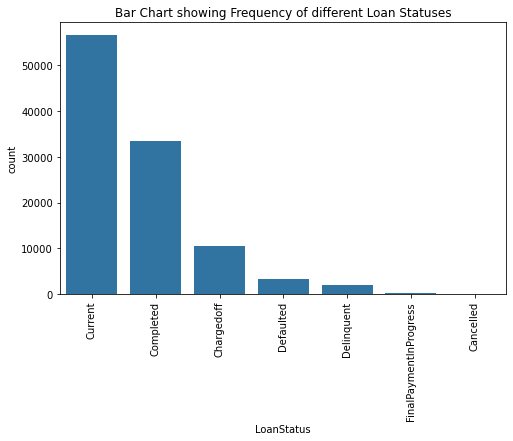

In [24]:
plt.figure(figsize=[8,5])
default_color=sb.color_palette()[0]

sb.countplot(data=loan_copy,x='LoanStatus',color=default_color,order=loan_status)
plt.xticks(rotation=90)
plt.title('Bar Chart showing Frequency of different Loan Statuses')
plt.show()

##### Observations
Most of the loans were current loans then completed loans all the way to cancelled loans which is the least frequent.

### Question: 
What is the distribution of the mean credit score?

##### Visualization

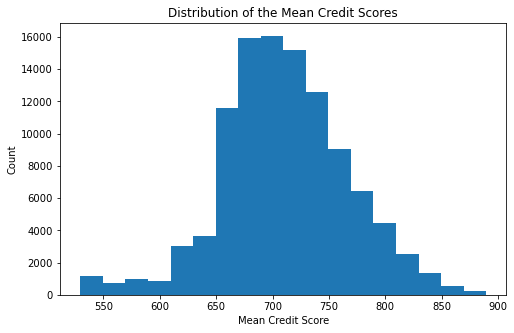

In [25]:
bins=np.arange(loan_copy['Credit_Score'].min(),loan_copy['Credit_Score'].max()+20,20)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='Credit_Score',bins=bins)
plt.xlabel('Mean Credit Score')
plt.ylabel('Count')
plt.title('Distribution of the Mean Credit Scores')
plt.show()

##### Observations

> I did feature engineering to get the mean column of upper and lower range of credit score. The plot is roughly symmetric, with the mean and the median approximately equal to each other.

### Question: 
How are the categories of credit grade and term distributed?

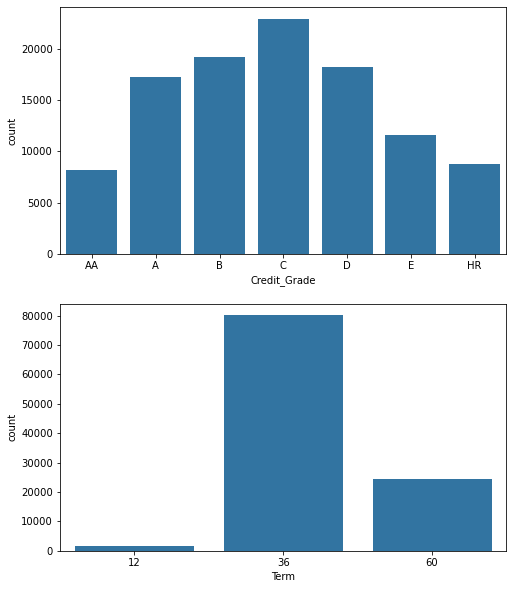

In [26]:
# Plotting Credit_Grade, and Term together to get an idea of each ordinal's variable distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = sb.color_palette()[0]

sb.countplot(data=loan_copy,x='Credit_Grade',color=default_color,ax=ax[0])
sb.countplot(data=loan_copy,x='Term',color=default_color,ax=ax[1])

plt.show()

##### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In order of increasing loan risk level AA——>HR, the frequency of loans for each category increases then reduces as it reaches HR grade loans. The most frequent loan risk is Grade C. Absolute low risk grade loans and high risk loans have about the same frequency.

## Question: 
What is the distribution of the Loaned Amounts

##### Visualization

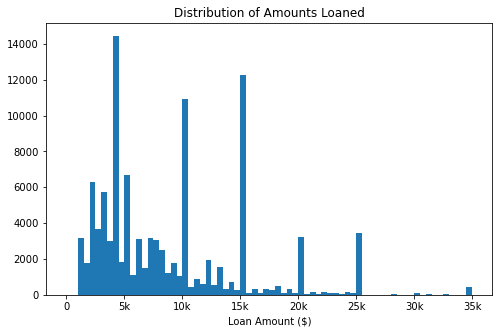

In [27]:
bins=np.arange(0,loan_copy['LoanOriginalAmount'].max()+500,500)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Amount ($)')
plt.xticks([0,5e3,10e3,15e3,20e3,25e3,30e3,35e3],[0,'5k','10k','15k','20k','25k','30k','35k'])
plt.title('Distribution of Amounts Loaned');

##### Obervations

> The loan amount is right skewed but with some intermittent spikes in the distribution of the amount. The points of the spikes are in thousands ie people tend to borrow 1000 dollars, 2000, 3000 dollars etc the more. I also noticed the minimum amount borrowed is 1000 dollars and maximum is 35k dollars.

## Question: 
What is the distribution of the Stated Monthly Income

##### Visualizations

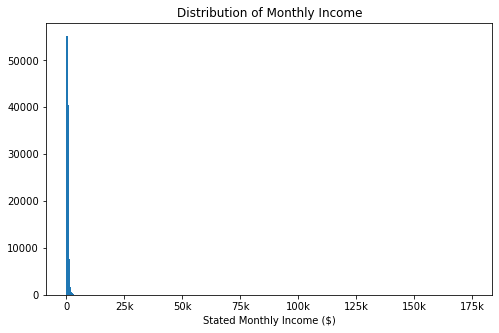

In [28]:
bins=np.arange(0,loan_copy['StatedMonthlyIncome'].max(),5000)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='StatedMonthlyIncome',bins=bins)
plt.title('Distribution of Monthly Income')
plt.xticks([0,0.25e6,0.5e6,0.75e6,1e6,1.25e6,1.5e6,1.75e6],[0,'25k','50k','75k','100k','125k','150k','175k'])
plt.xlabel('Stated Monthly Income ($)');

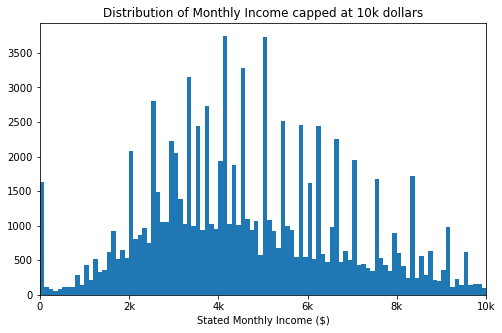

In [29]:
# setting the xlim at (0,10000) to see more values
bins=np.arange(0,loan_copy['StatedMonthlyIncome'].max(),100)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='StatedMonthlyIncome',bins=bins)
plt.title('Distribution of Monthly Income capped at 10k dollars')
plt.xlim(0,10000)
plt.xticks([0,2000,4000,6000,8000,10000],[0,'2k','4k','6k','8k','10k'])
plt.xlabel('Stated Monthly Income ($)');

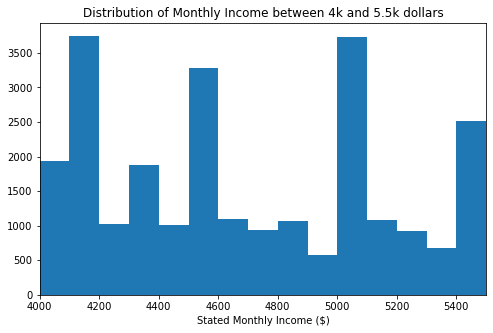

In [30]:
# setting the xlim at (0,10000) to see more values
bins=np.arange(0,loan_copy['StatedMonthlyIncome'].max(),100)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='StatedMonthlyIncome',bins=bins)
plt.title('Distribution of Monthly Income between 4k and 5.5k dollars')
plt.xlim(4000,5500)
plt.xlabel('Stated Monthly Income ($)');

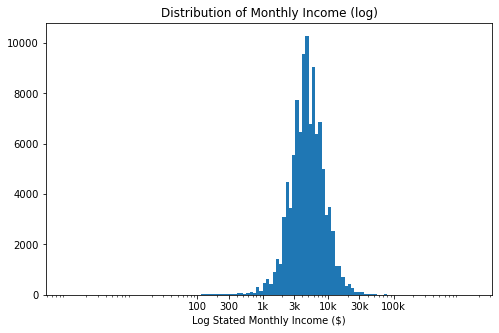

In [31]:
bins=10**np.arange(0,np.log10(loan_copy['StatedMonthlyIncome'].max()),0.05)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='StatedMonthlyIncome',bins=bins)

plt.xscale('log')
plt.title('Distribution of Monthly Income (log)')
plt.xticks([100,300,1000,3000,10000,30000,100000],[100,300,'1k','3k','10k','30k','100k'])
plt.xlabel('Log Stated Monthly Income ($)');

##### Observation

> From the first plot, we see that the monthly income is far skewed to the right. On zooming in (the second plot), we see that there are some spikes in the earnings. The log transform was also plotted, it was unimodal and symmetric.


> The monthly income was highly right skewed and crossed many orders of magnitude making an unbalanced scale, so I did a log transform on it so that when there is a linear model, I would be able to capture small and large differences at the low and high end of the scale respectively.

## Question: 
What is the distribution of the Borrower's rate?

##### Visualization

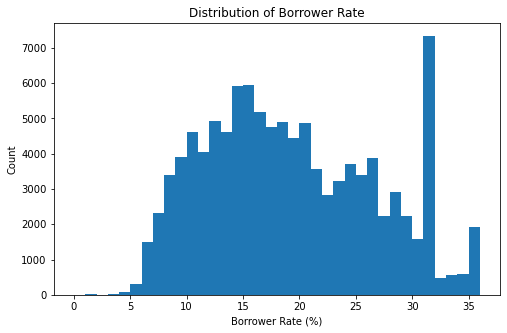

In [32]:
bins=np.arange(0,(loan_copy['BorrowerRate']*100).max()+1,1)
plt.figure(figsize=[8,5])

plt.hist(x=loan_copy['BorrowerRate']*100,bins=bins)
plt.xlabel('Borrower Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate')
plt.show()

##### Observation
Most the borrower's rate is 25% and below, though there is distinct spike at around 30%

## Question: 
What is the distribution of the duration of being employed before taking a loan?

##### Visualization

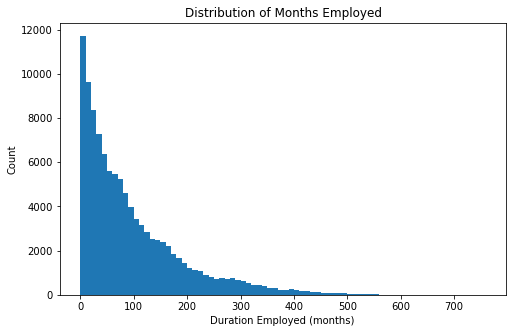

In [33]:
bins=np.arange(0,loan_copy['EmploymentStatusDuration'].max()+10,10)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='EmploymentStatusDuration',bins=bins)
plt.xlabel('Duration Employed (months) ')
plt.ylabel('Count')
plt.title('Distribution of Months Employed')
plt.show()

##### Observation
The plot is heavily right skewed with most of the observations having worked for 150 months and below

## Question: 
What is the distribution of the duration of the monthly loan payments?

##### Visualization

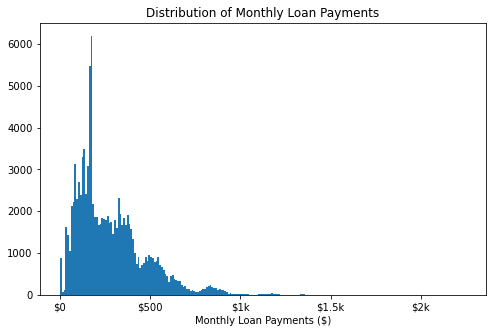

In [34]:
bins=np.arange(0,loan_copy['MonthlyLoanPayment'].max(),10)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='MonthlyLoanPayment',bins=bins)
plt.xticks([0,500,1000,1500,2000],['$0','$500','$1k','$1.5k','$2k'])
plt.xlabel('Monthly Loan Payments ($)')
plt.title('Distribution of Monthly Loan Payments')
plt.show()

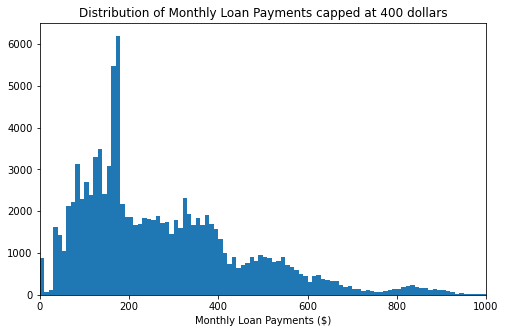

In [35]:
bins=np.arange(0,loan_copy['MonthlyLoanPayment'].max(),10)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='MonthlyLoanPayment',bins=bins)
plt.xlabel('Monthly Loan Payments ($)')
plt.title('Distribution of Monthly Loan Payments capped at 400 dollars')
plt.xlim(0,1000)
plt.show()

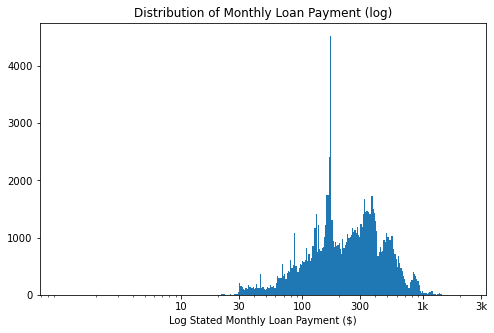

In [36]:
bins=10**np.arange(0,np.log10(loan_copy['MonthlyLoanPayment'].max()),0.01)
plt.figure(figsize=[8,5])

plt.hist(data=loan_copy,x='MonthlyLoanPayment',bins=bins)

plt.xscale('log')
plt.title('Distribution of Monthly Loan Payment (log)')
plt.xticks([10,30,100,300,1000,3000],[10,30,100,300,'1k','3k'])
plt.xlabel('Log Stated Monthly Loan Payment ($)');

##### Observation
As expected the monthly payments were right skewed (just like the stated monthly income). It also has its peak at between 150 dollars and 200 dollars.

## Bivariate Exploration

## Question:
Taking a look at the plot between Loan Status and Credit Score. Did the company that provided the credit score do a good job in the credit ratings?

##### Visualization

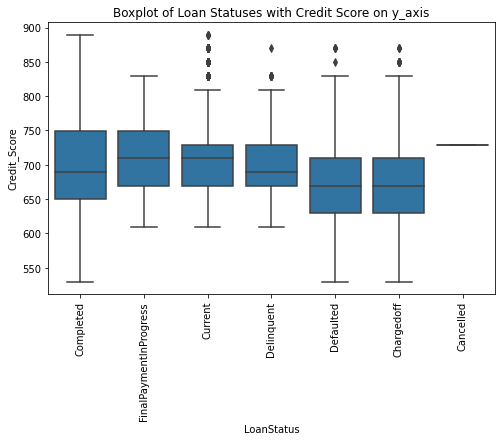

In [37]:
# Loan Status is ordered according to how an investor would prefer
default_color=sb.color_palette()[0]
plt.figure(figsize=[8,5])

sb.boxplot(x=loan_copy['LoanStatus'],y=loan_copy['Credit_Score'],color=default_color)
plt.xticks(rotation=90)
plt.title('Boxplot of Loan Statuses with Credit Score on y_axis')
plt.show()

##### Observations
> The company that gave the data did a decent job in identifying potential defaulters. Moving from left to right, we can see a drop in the median credit score (the people in the process of paying would raise the mean of the Completed category). The defaulters have a lower credit score than on average. The cancelled loan is just one observation so it is not enough to make conclusions from.

## Question:
Which category of loan status pays more money on a monthly basis?


##### Visualization

In [38]:
# computing the logarithm of monthly income to make bivariate plotting easier
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

loan_copy['LogMonthlyPayment']=loan_copy['MonthlyLoanPayment'].apply(log_trans)

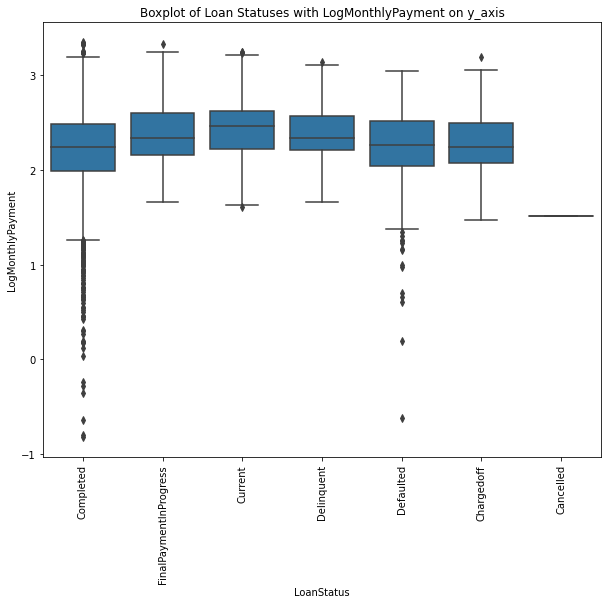

In [39]:
plt.figure(figsize=[10,8])
sb.boxplot(x=loan_copy['LoanStatus'],y=loan_copy['LogMonthlyPayment'],color=default_color)

plt.title('Boxplot of Loan Statuses with LogMonthlyPayment on y_axis')
plt.xticks(rotation=90)
plt.show()

##### Observations
Defaulted and charged off loans have the 2nd and 3rd lowest median monthly loan payments. So why do they pay the least? It is because they generally tend not to pay on time (hence the low credit scores in the plot before this) or when they do not pay on time, the payment made is lower than what it ought to and also the fact that they tend to borrow the least money (we wil see that in the next plot). Lending companies won't easily lend money to someone with low credit scores.

## Question:
Which category of loan status borrows more money?

##### Visualization

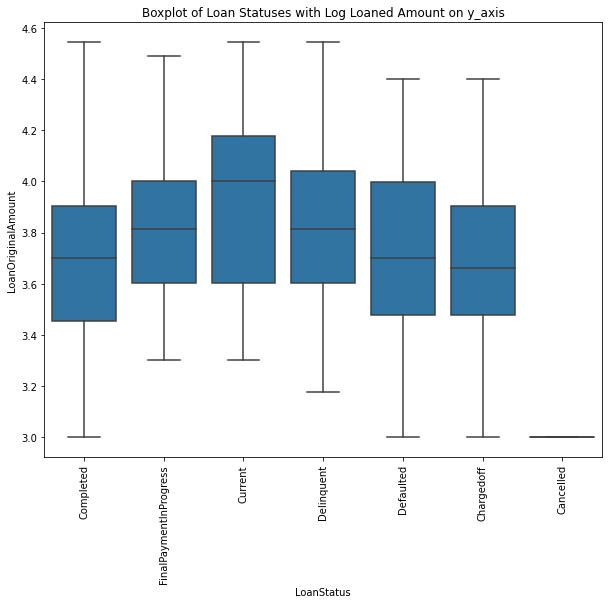

In [40]:
plt.figure(figsize=[10,8])
sb.boxplot(x=loan_copy['LoanStatus'],y=loan_copy['LoanOriginalAmount'].apply(log_trans),color=default_color)

plt.title('Boxplot of Loan Statuses with Log Loaned Amount on y_axis')
plt.xticks(rotation=90)
plt.show()

##### Observation
People that have completed their payments borrowed smaller amount of money in general (it easier to pay a small loan than a big one, as noticed on the plot, people in the Current category have the most amount of money to pay). Charged off and defaulted borrowed the least because of their lower credit scores and hence not worth the risk to the lender as explained under the previous plot.

## Question:
Which category of loan status earns more money?

##### Visualization

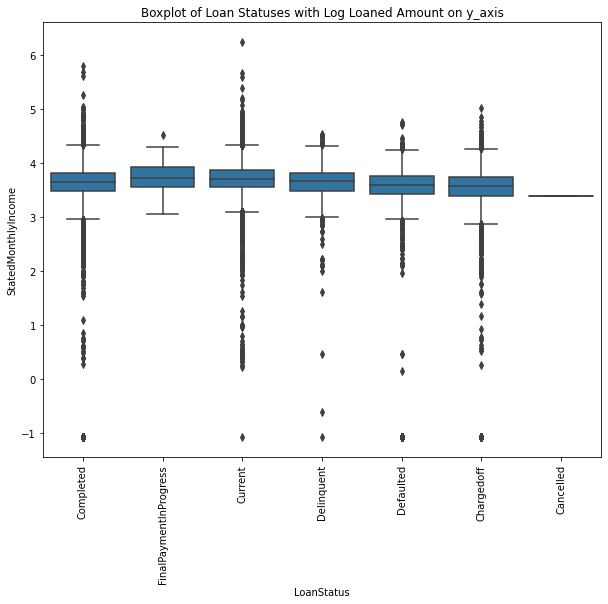

In [41]:
plt.figure(figsize=[10,8])
sb.boxplot(x=loan_copy['LoanStatus'],y=loan_copy['StatedMonthlyIncome'].apply(log_trans),color=default_color)

plt.title('Boxplot of Loan Statuses with Log Loaned Amount on y_axis')
plt.xticks(rotation=90)
plt.show()

##### Observations
There are plenty of outlier values, but the categories all earn roughly the same amount. So earnings is not the issue for that deliquent, defaulted and charged off do not/did not pay their debts. Why the non payment then?

## Question:
Why do some categories of loans end up defaulting or paying up on the loans?

##### Visualization

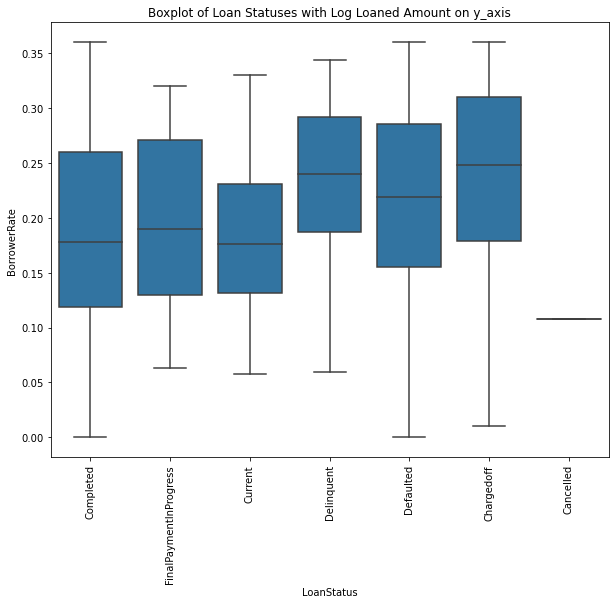

In [42]:
plt.figure(figsize=[10,8])
sb.boxplot(x=loan_copy['LoanStatus'],y=loan_copy['BorrowerRate'],color=default_color)

plt.title('Boxplot of Loan Statuses with Log Loaned Amount on y_axis')
plt.xticks(rotation=90)
plt.show()

##### Observation
The plausible explanation for the non-payment by the defaulters(delinquent, defaulted, charged off) is that the interest rate for their loans is higher than the average rate of 0.19. The cancelled category just has one observation so it is treated as an outlier. **The most likely reason is that lenders use the high interest rate to protect themselves when they know the borrower is less likely to pay.**

## Question:
How does each loan category relate with credit grade(credit risk)?

##### Visualization

In [43]:
# The visualisation is based on the 3 broad categories of a loan; 
# Completed, Current and Defaulted (Delinquent,defaulted,chargedoff). 

def fxn(df1,df2):
    cat1_order = ['AA','A','B','C','D','E','HR']
    cat2_order = ['Completed','Current','Defaulted']

    plt.figure(figsize=[10,8])
    artists = [] # for storing references to plot elements
    baselines = np.zeros(len(cat1_order))
    cat1_counts = loan_copy[df1].value_counts()

    # for each second-variable category:
    for i in range(len(cat2_order)):
        # isolate the counts of the first category,
        cat2 = cat2_order[i]
        inner_counts = loan_copy[loan_copy[df2] == cat2][df1].value_counts()
        inner_props = inner_counts / cat1_counts
        # then plot those counts on top of the accumulated baseline
        bars = plt.bar(x = np.arange(len(cat1_order)),
                       height = inner_props[cat1_order],
                       bottom = baselines)
        artists.append(bars)
        baselines += inner_props[cat1_order]

    plt.xticks(np.arange(len(cat1_order)), cat1_order,rotation=90)
    plt.title('Relative Frequencies of Credit Grade in each Loan Status')
    plt.xlabel('Relative Frequency')
    plt.ylabel('Loan Status Categories')
    plt.legend(reversed(artists),reversed(cat2_order),framealpha =1,bbox_to_anchor=(1, 0.5),loc=6,title='Broad Categories of Loan Status')
    plt.show()

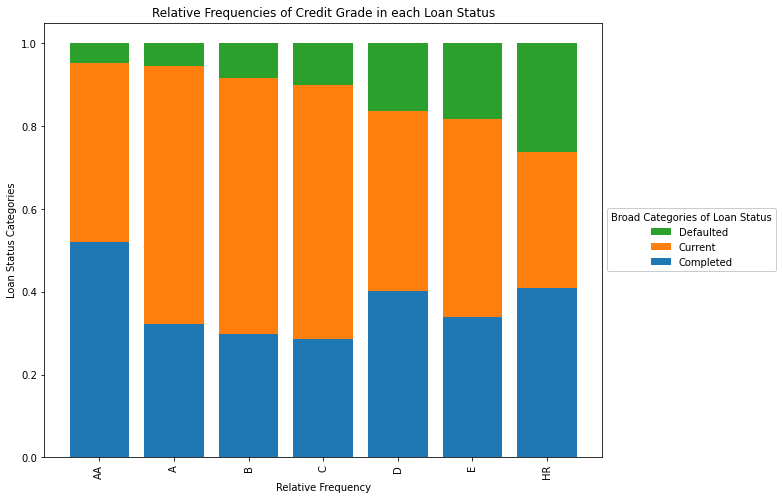

In [44]:
fxn('Credit_Grade','basic_loan_status')

##### Observation
<p>AA loans have the lowest proportion of defaulted loans and highest proportion of completed loans while HR loans have the highest proportion of defaulted loans (green).</p>
<p>What does this mean? It means that the loans level of risk was predicted to a fairly good level.</p>

## Question:
What makes a loan to be HR (high risk level) or AA(Low risk level) or even C (medium risk level)?

##### Visualization

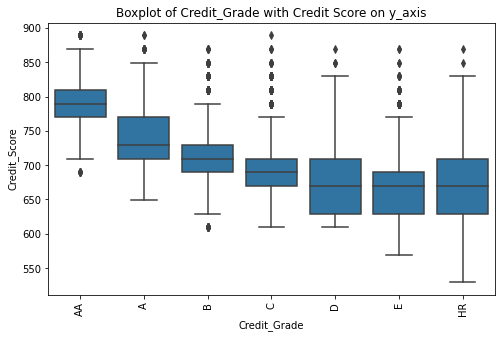

In [45]:
plt.figure(figsize=[8,5])

sb.boxplot(x=loan_copy['Credit_Grade'],y=loan_copy['Credit_Score'],color=default_color)
plt.xticks(rotation=90)
plt.title('Boxplot of Credit_Grade with Credit Score on y_axis')
plt.show()

##### Observations
From this plot, we can certainly say that the main thing that determines the loan risk level is the credit score of the individual. High risk loans are given to individuals with a low credit score while low risk loans are applicable when the individual has a higher credit score.

## Question:
Would a borrower be given a smaller loan because of the loan risk level?

##### Visualization

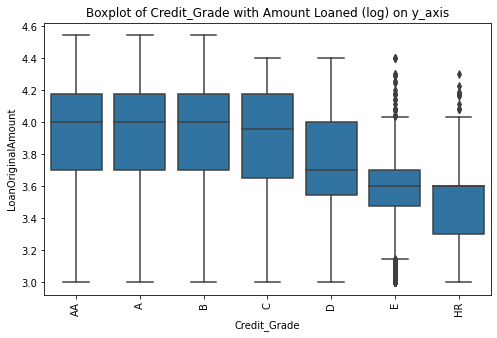

In [46]:
plt.figure(figsize=[8,5])

sb.boxplot(x=loan_copy['Credit_Grade'],y=loan_copy['LoanOriginalAmount'].apply(log_trans),color=default_color)
plt.xticks(rotation=90)
plt.title('Boxplot of Credit_Grade with Amount Loaned (log) on y_axis')
plt.show()

##### Observations
<p>We can see the gradual increase of HR aka High Risk loans (green label) as we move from Completed loans to Charged off loans. On the other hand, there is the relative gradual decrease in low risk loans. We have only a single cancelled Loan status observation, it is an outlier.</p>
<p>So, definitely a smaller loan would be given for a high risk level and vice versa.</p>

### How did the feature of interest (LoanStatus) vary with other features in the dataset?
<ul>
    <li>The credit score gave a good insight of what is to come as regards the loan status.</li>
    <li>Individuals that ended up having delinquent, defaulted or charged off loans did not have access to bigger funds to borrow.</li>
    <li>The proportion of High Risk loans that ended up being charged off is twice the number that ended up paying the loan. It     means the credit_grade gave a decent insight of how the loan status would end up.</li>
    <li>People with poor loan status generally had a higher interest rate on their loans.</li>
    <li>The income of the individual does not determine if the individual defaults or not.</li>
</ul>

#### Observation of interesting relationships between the other features (not the main feature of interest)
<ul>
    <li>The correlation plot of Credit_Score vs Loaned Original amount. The higher the credit score of the individual, the          higher the amount loaned to the person.</li>
    <li>The credit score is used to predict the credit grade (risk).</li>
</ul>

## Multivariate Exploration

## Question:
What is the relationship between credit score, credit grade and loan status?

##### Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


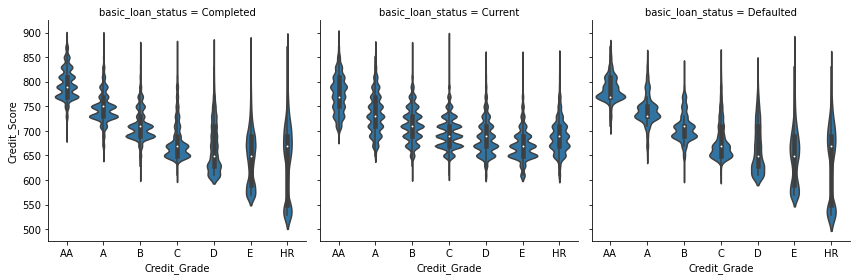

In [47]:
g=sb.FacetGrid(data=loan_copy,col='basic_loan_status',height=4,col_wrap=3)
g.map(sb.violinplot,'Credit_Grade','Credit_Score')

##### Observation
Looking at the first violinplot (AA) in each grid, we can see that the median credit score falls across the grids (basic loan status). This is a trend that is observable when comparing corresponding boxplots in the 3 grids.
<p>What does this mean?</p>
It means that as the credit grade tends to be riskier, credit score would be smaller and the probability for defaults are increased

## Question:
To see the correlation values of the numerical variables on a heatmap

##### Visualization

In [48]:
num_vars=['BorrowerRate','EmploymentStatusDuration','StatedMonthlyIncome','LoanOriginalAmount','Credit_Score',
          'MonthlyLoanPayment']

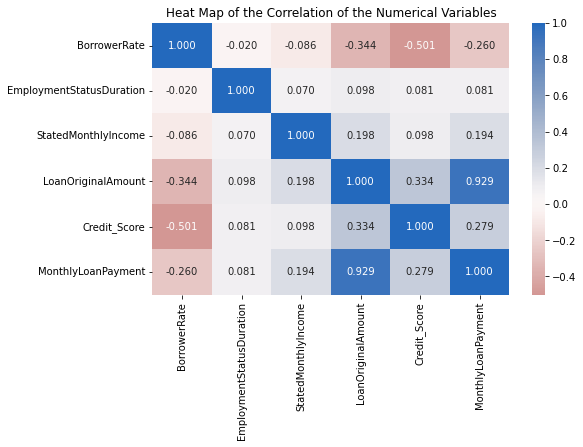

In [49]:
plt.figure(figsize=[8, 5])
sb.heatmap(loan_copy[num_vars].corr(),annot=True, fmt='.3f',
           cmap='vlag_r',center=0)
plt.title('Heat Map of the Correlation of the Numerical Variables')
plt.show()

##### Observation
Monthly loan payments and Loan amount are strongly correlated, this is to be expected as borrowers pay according to what they borrow. Borrower rate and credit score are moderately negatively correlated.

## Question:
Taking a look at the scatter plot of the correlation of the numerical variables

##### Visualization

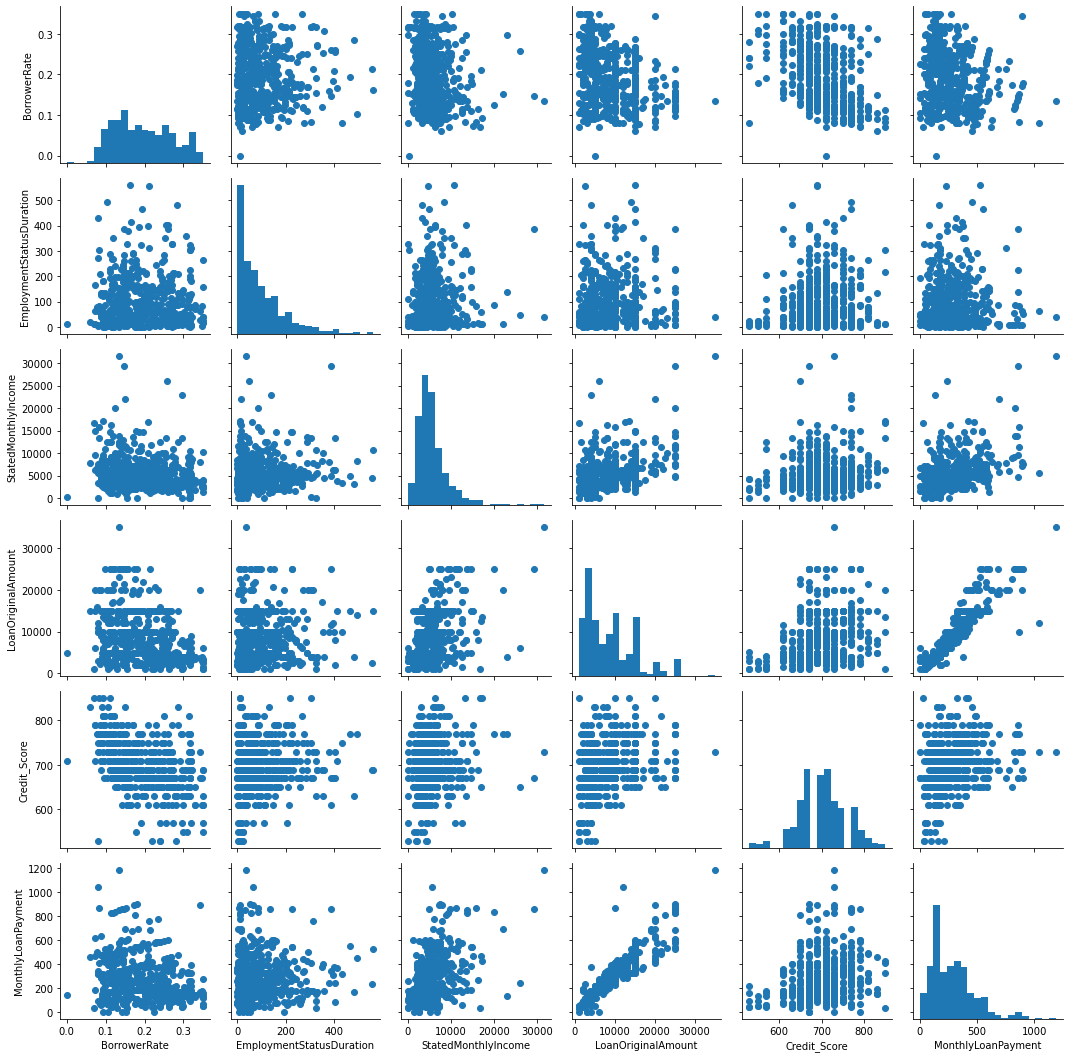

In [50]:
samples=np.random.choice(loan_copy.shape[0],500,replace=False)
loan_samp=loan_copy.loc[samples]
# loan_samp=loan_copy.loc[samples:,]

g=sb.PairGrid(data=loan_samp,vars=num_vars)
g=g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

##### Observation
Loan Original amount, Monthly loan payment and stated monthly income are correlated positively amongst each other while Borrower's rate is significantly negatively correlated with the former two. Credit Score is graded in differences of 10 hence the points in its plot being arranged in straight lines.

## Question:
How do Loaned amount and Borrower Rate compare between the basic loan statuses?

##### Visualization

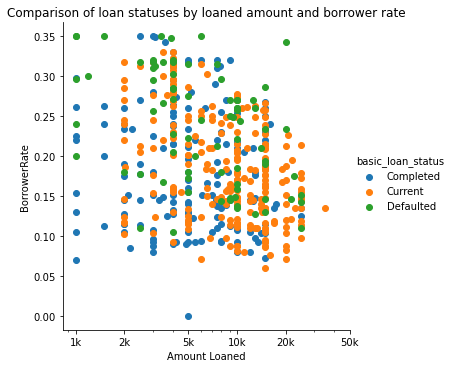

In [51]:
# using a subset of the data to plot

g=sb.FacetGrid(data=loan_samp,hue='basic_loan_status',height=5)
g.map(plt.scatter,'LoanOriginalAmount','BorrowerRate')
g.set(xscale='log')
x_ticks=[1e3,2e3,5e3,10e3,20e3,50e3]
x_labels=['1k','2k','5k','10k','20k','50k']
g.set(xticks=x_ticks,xticklabels=x_labels,title='Comparison of loan statuses by loaned amount and borrower rate')
g.set_xlabels('Amount Loaned')

g.add_legend()
plt.show()

##### Observation
<ul>
    <li>The dots seem to be scattered randomly around the plot but upon more observation, we see that the Defaulted loans (orange dots) are more in the upper limits of the plot meaning they usually have higher borrower rates than on average.</li>
    <li>At the left bottom of the plot, only green dots are there meaning that loans with low borrower rate and low loaned amount are generally completed.</li>
    <li>At the top right corner, the density of dots there are low meaning big loans are not given out at high borrower rates.</li>
</ul>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
<ul>
<li>Parts of the features that strengthened each other was the relationship between loan status, credit score and credit grade. With reducing loan status, the credit score reduces and the peak of each violin plot reduces also.</li>
<li>Big loans are not given out at high borrower rates</li>
<li>Defaulted loans do not usually have low borrower rates, the ones that do, have bigger than average loaned amount</li>
</ul>

### Were there any interesting or surprising interactions between features?

> The negative correlation between credit score and borrower's rate but I later understood why it was so. A person's income does not have much impact on whether the individual defaults or not, I thought higher income individuals would pay on time.

## Conclusions
<ul>
    <li>To get a glimpse each the borrower would default or not, a lender should look at the credit score.</li>
    <li>For access to higher monetary loans, the borrower should have a good credit score.</li>
    <li>People that generally default on their loans have higher interest rate.</li>
    <li>A person's income does not have much impact on whether the individual defaults or not.</li>
    <li>The ratio of High risk loans are way more in Charged off loans than Completed loans.</li>
</ul>

#### References

[Difference between Default and Charged off loans](https://news.fintechnexus.com/the-difference-between-a-default-and-a-charge-off-at-lending-club/#:~:text=In%20general%2C%20a,of%20bankruptcy%20notification.)